In [22]:
import cryptowatch as cw
cw.api_key = "XCC4V250APN2D1B20WMR"
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def get_ticker(ticker, n, timeframe):
    colnames = ['close_timestamp', 'open', 'high', 'low', 'close', 'volume_base', 'volume_quote']
    candles = cw.markets.get(ticker, ohlc=True)
    
    if timeframe == "minute":
        candles = candles.of_1m[:n]
        
    if timeframe == "hour":
        candles = candles.of_1h[:n]
        
    if timeframe == "day":
        candles = candles.of_1d[:n]
        
    candles = pd.DataFrame(data = candles, columns = colnames)
    candles = candles.rename({"close_timestamp": "unix"}, axis = 1)
    candles = candles[["unix", "close"]]
    coinname = ticker.split(':')[1]
    candles = candles.rename({"close":coinname}, axis = 1)
    candles = candles[::-1].reset_index(drop = True)
    candles = candles.set_index("unix")
    return candles

def form_df(ticker_data):
    df = ticker_data[0]
    for i in range(1, len(ticker_data)):
        df = df.join(ticker_data[i])
    return df  

def plot_grided(df, rows, columns):
    cols = df.columns
    labelcols = [i.split("USDT")[0] for i in df.columns.to_list()]
    plotn = 0
    fig, ax_array = plt.subplots(rows, columns,squeeze=False)
    fig.set_figheight(7)
    fig.set_figwidth(15)
    for i,ax_row in enumerate(ax_array):
        for j,axes in enumerate(ax_row):
            axes.set_title(labelcols[plotn])
            #axes.set_yticklabels([])
            axes.set_xticklabels([])
            axes.plot(df.loc[:,cols[plotn]],'r-')
            plotn = plotn + 1
    plt.show()
    
def plot_scatter(df):
    d = df.copy()
    x = d.iloc[-1, :].values
    y = [i for i in range(1, len(x)+1)]
    yticks = [i.split("USDT")[0] for i in d.columns.to_list()]
    plt.figure(figsize=(7,7))
    plt.yticks(y, yticks)
    plt.scatter(x, y)
    plt.xlim([-3, 3])
    plt.axvline(x=-2, color = "r", alpha = 0.3)
    plt.axvline(x=2, color = "r", alpha = 0.3)
    plt.show()  
    
def get_zscore(col):
    mean = np.nanmean(col)
    sd = np.nanstd(col, ddof = 1)
    
    return (col - mean)/sd

def get_zscore_df(data, windowsize):
    df = data.copy()
    w = df.iloc[-windowsize:, :]
    for col in w.columns:
        w[col] = get_zscore(w[col])
    return w

def check_for_outliers(df):
    for t, v in zip(df.columns, df.iloc[-1,:]):
        if abs(v) > 2:
            print("FOUND:",t, v)
            
tickers = ["BINANCE:" + i + "USDT" for i in pd.read_csv("tickers.txt").ticker]

def show_analysis(timeframe, n):
    ticker_data = [get_ticker(ticker, n, timeframe) for ticker in tickers]
    df = form_df(ticker_data)
    df = get_zscore_df(df, n)
    check_for_outliers(df)
    plot_grided(df, 4, 5)
    plot_scatter(df)

FOUND: BNBUSDT -2.359031623299075
FOUND: DOTUSDT -3.1970953295203515
FOUND: AVAXUSDT -2.1832210553582874
FOUND: LUNAUSDT -3.0039351534155
FOUND: TRXUSDT -2.2160364364127765


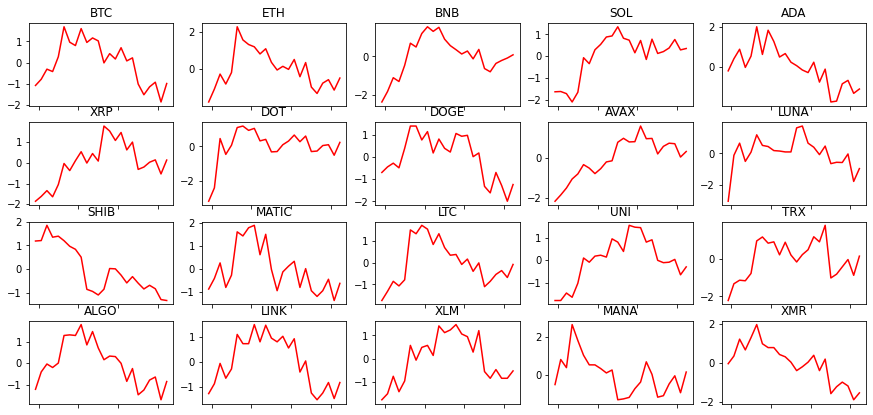

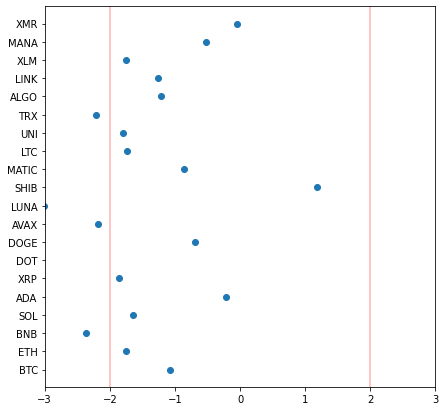

In [25]:
show_analysis('hour', 24)

FOUND: XRPUSDT 2.010587954983595


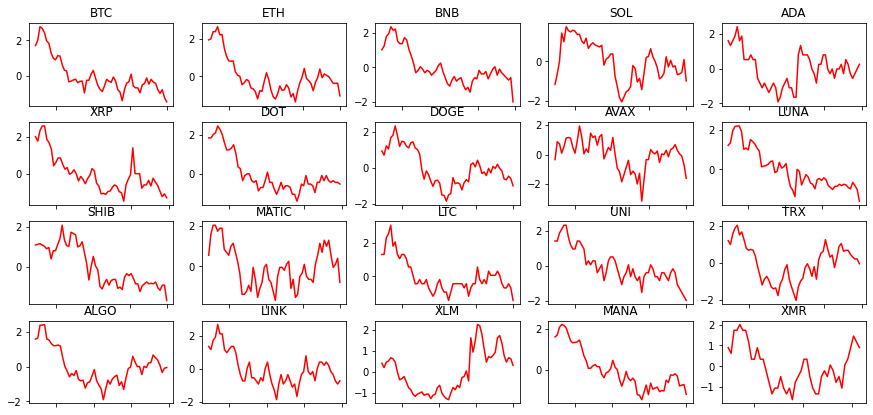

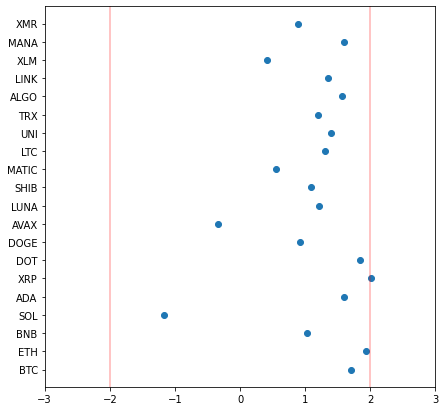

In [26]:
show_analysis('minute', 60)